In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *

In [ ]:
crimes3['Primary Type'].value_counts()

In [54]:
crimes3['Ward'].nunique()

50

In [49]:
crimes3.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,3,89,197,673,911,1108,1130,1801,1868,1891
ID,10508693,10508695,10508697,10508698,10508699,10508702,10508703,10508704,10508709,10508982
Case Number,HZ250496,HZ250409,HZ250503,HZ250424,HZ250455,HZ250447,HZ250489,HZ250514,HZ250523,HZ250667
Date,2016-05-03 23:40:00,2016-05-03 21:40:00,2016-05-03 23:31:00,2016-05-03 22:10:00,2016-05-03 22:00:00,2016-05-03 22:35:00,2016-05-03 22:30:00,2016-05-03 21:30:00,2016-05-03 16:00:00,2016-05-03 22:30:00
Block,013XX S SAWYER AVE,061XX S DREXEL AVE,053XX W CHICAGO AVE,049XX W FULTON ST,003XX N LOTUS AVE,082XX S MARYLAND AVE,027XX S STATE ST,002XX E 46TH ST,014XX W DEVON AVE,069XX S ASHLAND AVE
IUCR,0486,0486,0470,0460,0820,041A,0460,0460,0460,0486
Primary Type,BATTERY,BATTERY,PUBLIC PEACE VIOLATION,BATTERY,THEFT,BATTERY,BATTERY,BATTERY,BATTERY,BATTERY
Description,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,RECKLESS CONDUCT,SIMPLE,$500 AND UNDER,AGGRAVATED: HANDGUN,SIMPLE,SIMPLE,SIMPLE,DOMESTIC BATTERY SIMPLE
Location Description,APARTMENT,RESIDENCE,STREET,SIDEWALK,RESIDENCE,STREET,CHA HALLWAY/STAIRWELL/ELEVATOR,RESIDENCE PORCH/HALLWAY,SIDEWALK,STREET
Arrest,True,False,False,False,False,False,False,False,False,False


In [4]:
crimes_corr = crimes3.corr()


In [37]:
#crimes2 = pd.read_csv('F:\Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes = pd.read_csv('C:/Users/mehta/Desktop/ADS/Final_Project/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
#crimes = pd.concat([crimes2, crimes3], ignore_index=False, axis=0)


In [5]:
crimes3['Primary Type'].isnull().sum()

0

In [10]:
crimes.head(3).T

,0,1,2
Unnamed: 0,3,89,197
ID,10508693,10508695,10508697
Case Number,HZ250496,HZ250409,HZ250503
Date,05/03/2016 11:40:00 PM,05/03/2016 09:40:00 PM,05/03/2016 11:31:00 PM
Block,013XX S SAWYER AVE,061XX S DREXEL AVE,053XX W CHICAGO AVE
IUCR,0486,0486,0470
Primary Type,BATTERY,BATTERY,PUBLIC PEACE VIOLATION
Description,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,RECKLESS CONDUCT
Location Description,APARTMENT,RESIDENCE,STREET
Arrest,True,False,False


In [11]:
print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

Dataset Shape before drop_duplicate :  (1456714, 23)
Dataset Shape after drop_duplicate:  (1456714, 23)


In [12]:
# We Will not be using the following columns for our Exploratory Analysis, Hence we have dropped the coloumns
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code',
             'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)

In [13]:
max_browser = pd.DataFrame(crimes.groupby('Location Description').size().rename('cnt')).idxmax()[0]
crimes['Location Description'] = crimes['Location Description'].fillna(max_browser)
crimes.dropna(subset=['Longitude'], how = 'any', inplace = True)
crimes.dropna(subset=['Latitude'], how = 'any', inplace = True)

In [14]:
crimes.head(3).T

,0,1,2
ID,10508693,10508695,10508697
Date,05/03/2016 11:40:00 PM,05/03/2016 09:40:00 PM,05/03/2016 11:31:00 PM
Block,013XX S SAWYER AVE,061XX S DREXEL AVE,053XX W CHICAGO AVE
Primary Type,BATTERY,BATTERY,PUBLIC PEACE VIOLATION
Description,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,RECKLESS CONDUCT
Location Description,APARTMENT,RESIDENCE,STREET
Arrest,True,False,False
Domestic,True,True,False
Latitude,41.8641,41.7829,41.8949
Longitude,-87.7068,-87.6044,-87.7584


In [15]:
crimes.isnull().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Latitude                0
Longitude               0
dtype: int64

In [16]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419631 entries, 0 to 1456713
Data columns (total 10 columns):
ID                      1419631 non-null int64
Date                    1419631 non-null object
Block                   1419631 non-null object
Primary Type            1419631 non-null object
Description             1419631 non-null object
Location Description    1419631 non-null object
Arrest                  1419631 non-null bool
Domestic                1419631 non-null bool
Latitude                1419631 non-null float64
Longitude               1419631 non-null float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 100.2+ MB


In [17]:
#Since date is in object type, we need to convert it to datetime format
crimes3.Date = pd.to_datetime(crimes3.Date, format='%m/%d/%Y %I:%M:%S %p')



In [18]:
crimes['Primary Type'].isnull().sum()

0

In [19]:
## Adding weekday
crimes3['Day']=crimes3['Date'].dt.weekday_name

In [20]:
## Adding hour
crimes3['Hour']=crimes3['Date'].dt.hour

In [21]:
## Adding month
crimes3['Month']=crimes3['Date'].dt.month

In [24]:
## Addning Year
crimes3['Year']= crimes3['Date'].dt.year

In [25]:
#Setting the index to be date
crimes.index = pd.DatetimeIndex(crimes.Date)

In [26]:
crimes.shape

(1419631, 10)

In [27]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)



In [28]:
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [29]:
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

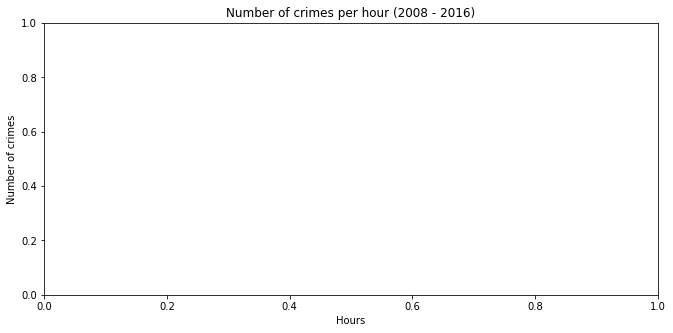

In [45]:
plt.figure(figsize=(11,5))
plt.title('Number of crimes per hour (2008 - 2016)')
plt.xlabel('Hours')
plt.ylabel('Number of crimes')
plt.show()

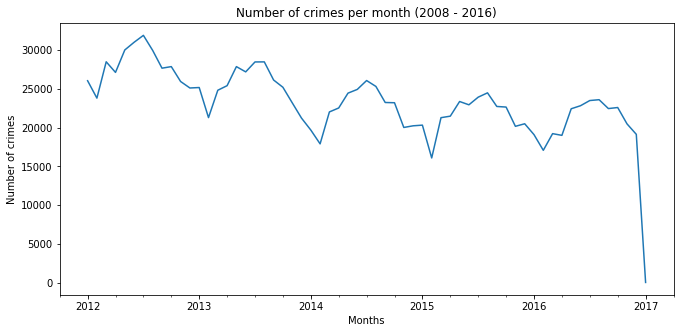

In [32]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2008 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


In [40]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [41]:
x1 = crimes.groupby(["Arrest"])

x1 = x1.get_group(True)

x = pd.DataFrame({'crime_count' : crimes.groupby("District")["Primary Type"].count()}).reset_index()

y = pd.DataFrame({'arrest_count' : x1.groupby("District")["Arrest"].count()}).reset_index()

safe_city = x.merge(y, left_index=True , right_index=True, how = 'inner', on = 'District')

safe_city['stats'] = safe_city['crime_count'] - safe_city['arrest_count']

safe_city['stats_ratio'] =  (safe_city['arrest_count'] / safe_city['crime_count'])*100

d = (safe_city.loc[safe_city['stats_ratio'] <= 25])

d1 = d["District"].values

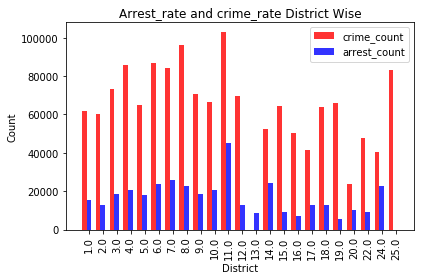

In [42]:
n_groups = len(safe_city["District"].values)
means_frank = safe_city["crime_count"]
means_guido = safe_city["arrest_count"]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
                alpha=opacity,
                color='r',
                label='crime_count')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                alpha=opacity,
                color='b',
                label='arrest_count')

plt.xlabel('District')
plt.ylabel('Count')
plt.title('Arrest_rate and crime_rate District Wise')
plt.xticks(index + bar_width, safe_city["District"],rotation = 90)
plt.legend()

plt.tight_layout()
plt.show()

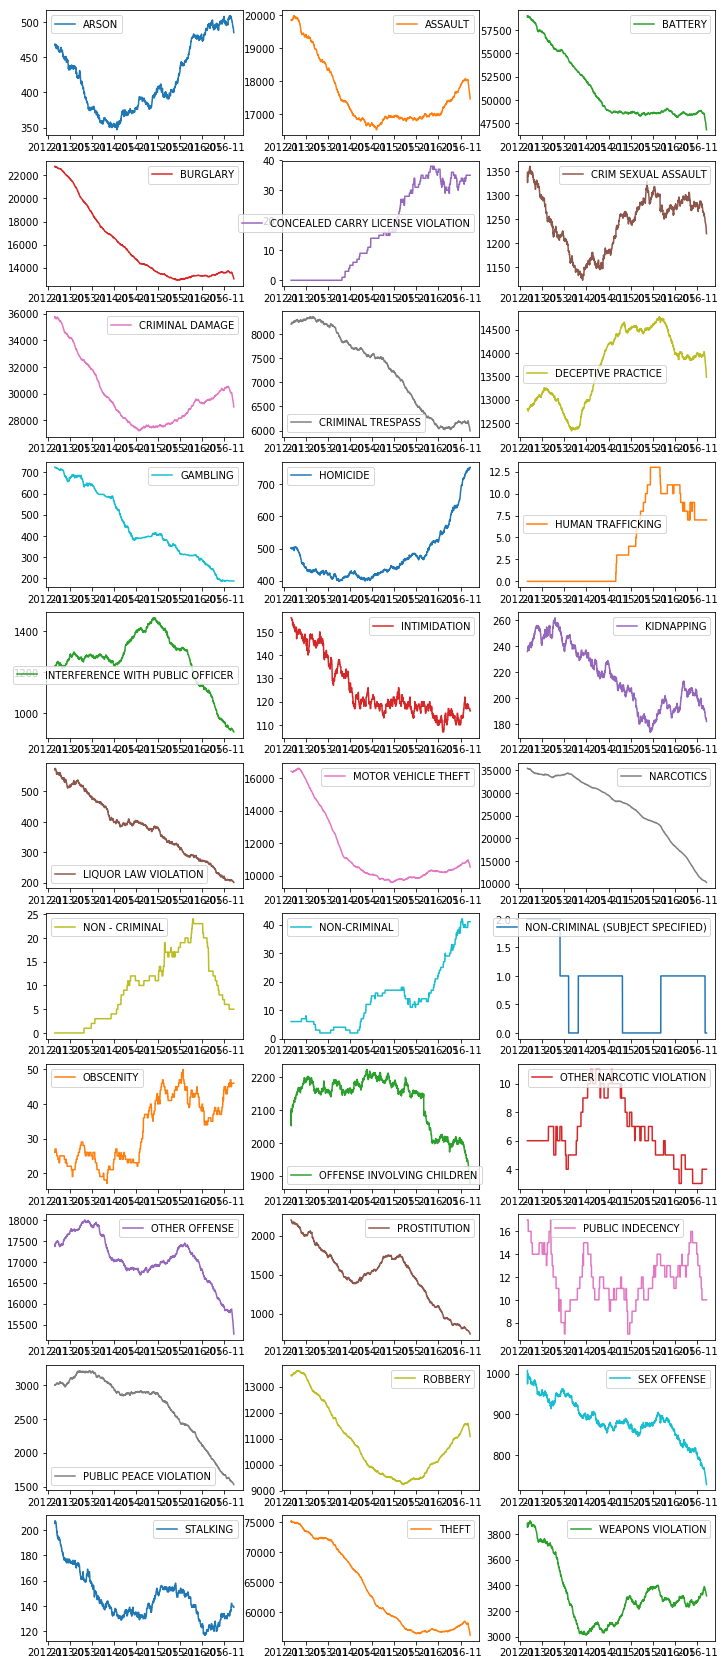

In [31]:
# Crimes Seperated by types and its occurance in the years
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

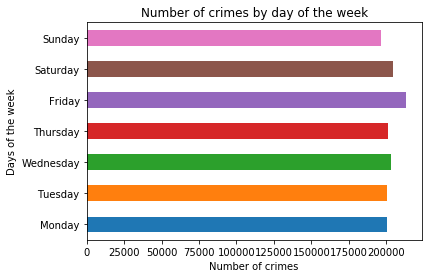

In [34]:
#Number of crimes during specific days of the week
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

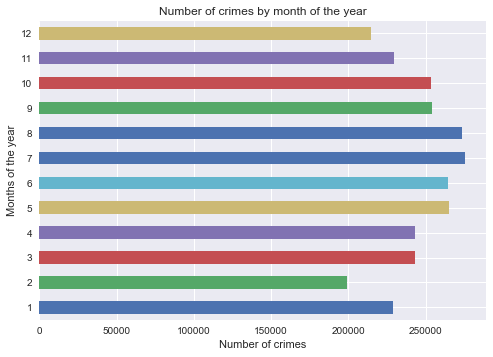

In [42]:
#Number of crimes during specific month of the years
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

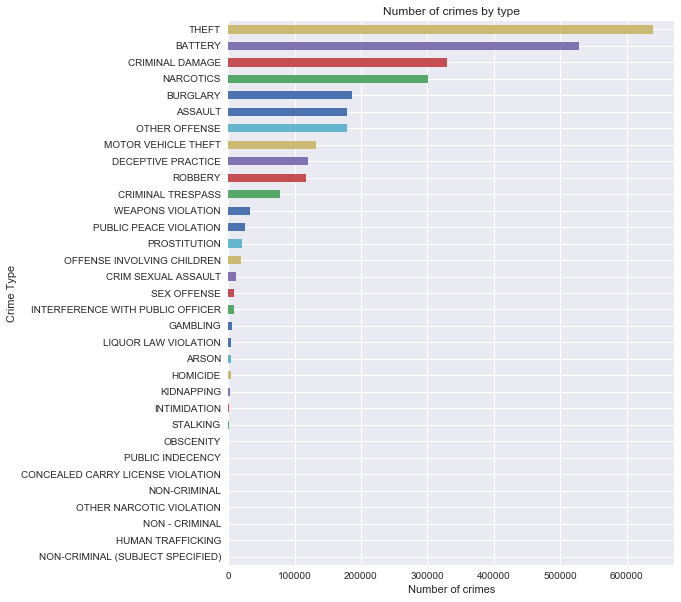

In [43]:
#Number of crimes based on primary type
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()


In [9]:
x = crimes3.groupby([crimes3['Primary Type']]).size().sort_values(ascending=True)

In [10]:
c = pd.DataFrame(x)

In [12]:
c = c.reset_index()

In [55]:
crimes3['Location Description'].nunique()

142

In [21]:
for i,v in c.iterrows():
    print(v['Primary Type'],v[0])

NON-CRIMINAL (SUBJECT SPECIFIED) 4
HUMAN TRAFFICKING 28
OTHER NARCOTIC VIOLATION 30
NON - CRIMINAL 38
PUBLIC INDECENCY 62
CONCEALED CARRY LICENSE VIOLATION 90
NON-CRIMINAL 93
OBSCENITY 187
INTIMIDATION 662
STALKING 828
KIDNAPPING 1099
LIQUOR LAW VIOLATION 1953
GAMBLING 2212
ARSON 2217
HOMICIDE 2649
SEX OFFENSE 4885
INTERFERENCE WITH PUBLIC OFFICER 6195
CRIM SEXUAL ASSAULT 6823
PROSTITUTION 7633
OFFENSE INVOLVING CHILDREN 11398
PUBLIC PEACE VIOLATION 13122
WEAPONS VIOLATION 17233
CRIMINAL TRESPASS 36912
ROBBERY 57313
MOTOR VEHICLE THEFT 61138
DECEPTIVE PRACTICE 75495
BURGLARY 83397
OTHER OFFENSE 87874
ASSAULT 91289
NARCOTICS 135240
CRIMINAL DAMAGE 155455
BATTERY 263700
THEFT 329460


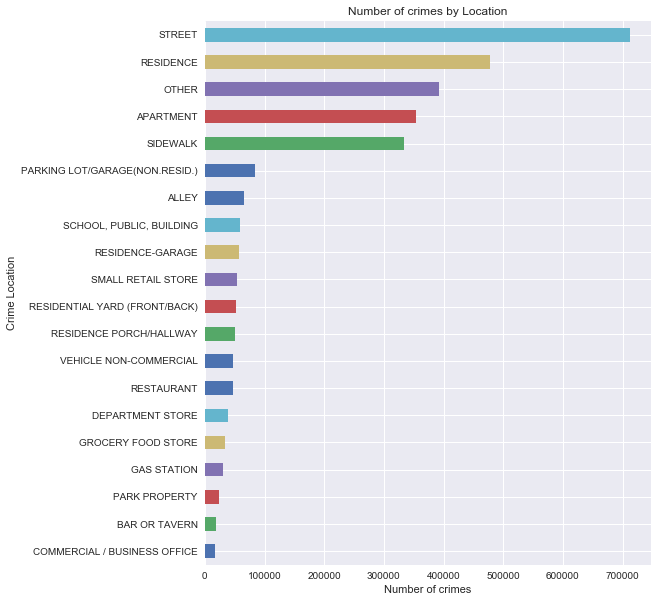

In [44]:
#Based on Location Description
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [85]:
df['Block area'], df['Street Ad'] , df['Ave'] = df['Block'].str.split('XX' , expand= True).reset_index()

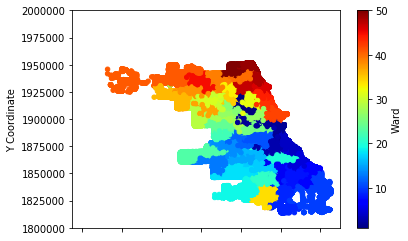

In [43]:
crimes.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='Ward', cmap=plt.get_cmap('jet'))
plt.xlim(1075000,1210000)
plt.ylim(1800000, 2000000)
plt.figure(figsize=(30,30))